The discrete-time multi-period model in Kyle ([1985](http://www.jstor.org/stable/1913210)). We normalize $\Delta t=1/N$ and $\Sigma_0=1$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from math import sqrt
from collections import namedtuple
%matplotlib inline

In [3]:
KyleSolution = namedtuple("KyleSolution","N varu t alpha beta delta lamb Sigma")

In [68]:
def solve_kyle(N,varu):
    delta_t = 1.0/N
    alpha = np.empty(N+1)
    delta = np.empty(N+1)
    beta = np.empty(N+1)
    lamb = np.empty(N+1)
    Sigma = np.empty(N+1)

    alpha[N] = 0
    delta[N] = 0
    # An arbitrary value for Sigma[N].
    # At the end of the solution we will scale by the
    # right factor to meet the boundary condition for
    # Sigma[0]
    Sigma[N] = 1 

    for n in range(N,-1,-1):
        if n==N:
            lamb[n] = sqrt((0.5*Sigma[n])/(varu*delta_t))
        else:
            f = lambda l: (1-l**2*varu*delta_t/Sigma[n])*(1-alpha[n]*l)-0.5
            val,res = scipy.optimize.brentq(f,
                                            0,1/alpha[n],
                                            full_output = True)
            assert res.converged
            lamb[n] = val            
    
        beta[n] = (1-2*alpha[n]*lamb[n])/(2*lamb[n]*delta_t*(1-alpha[n]*lamb[n]))
    
        if n>0:
            alpha[n-1] = 1/(4*lamb[n]*(1-alpha[n]*lamb[n]))
            delta[n-1] = delta[n]+alpha[n]*lamb[n]**2*varu*delta_t
            Sigma[n-1] = Sigma[n]/(1-beta[n]*lamb[n]*delta_t)
    
    # Rescale solution to get Sigma[0]=1. 
    # Note that the scaling given in the original Kyle paper
    #  are incorrect.
    scale = sqrt(Sigma[0])
    Sigma /= scale**2
    alpha *= scale
    delta /= scale
    beta *= scale
    lamb /= scale
    
    return KyleSolution(N=N,
                        varu = varu,
                        t = np.linspace(0,1,N+1),
                        alpha = alpha,
                        beta = beta,
                        delta = delta,
                        lamb = lamb,
                        Sigma = Sigma)

In [61]:
def comparison_plot(modlab,attr):
    for mod,lab in modlab:
        plt.plot(mod.t,getattr(mod,attr),label=lab)
    plt.legend()
    plt.title(attr)

In [62]:
params = [("N=50",50,0.5),
          ("N=1000",1000,0.5)]
mods = [(solve_kyle(N,varu),l) for l,N,varu in params]

In [63]:
fmt = "{:>20} | {}"
print(fmt.format("model","Sigma[N]"))
for s,l in mods:
    print("{:>20} | {:.4f}".format(l,s.Sigma[-1]))

               model | Sigma[N]
                N=50 | 0.0267
              N=1000 | 0.0014


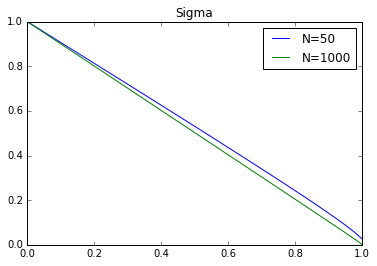

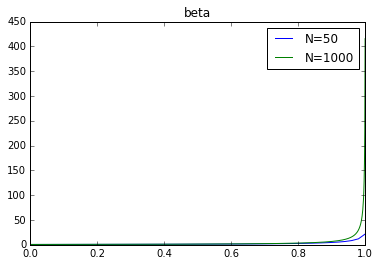

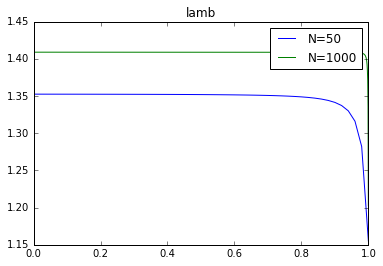

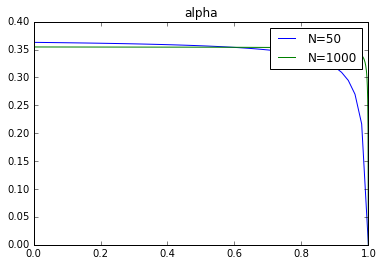

In [64]:
for attr in ["Sigma","beta","lamb","alpha"]:
    comparison_plot(mods,attr)
    plt.show()